In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [8]:

# initialize dataset
N = 441
k = 150
x = []
y = []
np.random.seed(1)

for j in range(0,21):
    for k in range(0,21):
        x.append([-2+0.2*j,-2+0.2*k])
    
#x[i][0] represents the x-coordinate of the i-th data point, 
#x[i][1] represents the y-coordinate of the i-th data point
#calculate  squared Euclidean distance from origin 0,0
for i in range(0,N):
    f = (x[i][0] - 0 **2 +x[i][1]- 0 **2 )
    
    if f <= 1:
        x[i].append(1)
    else:
        x[i].append(-1)

x = np.array(x).reshape(N,3)
# the first two columns represents for the sample data points, and the last column is their label


In [9]:
#training network 
# to ensure that the model does not learn any ordering or bias from the original arrangement of the data point
np.random.shuffle(x)
train_size = int(N * 0.8)

train_x  = x[:train_size, :-1]
test_x   = x[train_size:, :-1]
train_y  = x[:train_size, -1:]
test_y   = x[train_size:, -1:]



In [10]:
# define a class of RBF Neural Network
class RBFNN(object):
    def __init__(self,k,sigma):
        random.seed(1)
        self.k = k
        self.weights = None
        self.sigma = sigma
        self.weights = np.random.randn(k)
        self.centers = None

    def kernel_function(self, x, center):
        return np.exp(-1 / (2 * self.sigma ** 2) * np.linalg.norm(x - center) ** 2)

    def interpolation_matrix(self, x):
        n = x.shape[0]
        G = np.empty((n, self.k))
        for i in range(0, n):
            for j in range(0, self.k):
                G[i, j] = self.kernel_function(x[i], self.centers[j])
        return G

    def random_centers(self, x):
        indices = np.random.choice(x.shape[0], self.k)
        centers = x[indices]
        return centers

    def kmeans_centers(self, x):
        kmeans = KMeans(n_clusters=self.k)
        kmeans.fit(x)
        centers = kmeans.cluster_centers_
        return centers

    def full_centers(self, x):
        centers = x
        return centers

    def fit_full(self, x, y):
        self.centers = self.full_centers(x)
        G = self.interpolation_matrix(x)
        self.weights = np.linalg.pinv(G) @ y
        interpolated_values = G @ self.weights
        error = interpolated_values - y
        squared_error = np.square(error)
        mean_squared_error = squared_error.mean()
        return mean_squared_error

    def fit_randomly(self, x, y):
        self.centers = self.random_centers(x)
        G = self.interpolation_matrix(x)
        self.weights = np.linalg.pinv(G) @ y
        interpolated_values = G @ self.weights
        error = interpolated_values - y
        squared_error = np.square(error)
        mean_squared_error = squared_error.mean()
        return mean_squared_error

    def fit_kmeans(self, x, y):
        self.centers = self.kmeans_centers(x)
        G = self.interpolation_matrix(x)
        self.weights = np.linalg.pinv(G) @ y
        interpolated_values = G @ self.weights
        error = interpolated_values - y
        squared_error = np.square(error)
        mean_squared_error = squared_error.mean()
        return mean_squared_error

    def predict(self, x, y):
        G = self.interpolation_matrix(x)
        pred = np.dot(G, self.weights)
        pred = np.sign(pred)
        accuracy = (pred == y)
        accuracy_mean = (accuracy).mean() * 100
        return accuracy_mean

    def __del__(self):
        self.weights = None
        self.centers = None


In [11]:
sigmas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,11,12,13,14,15,20,50,100,1000]

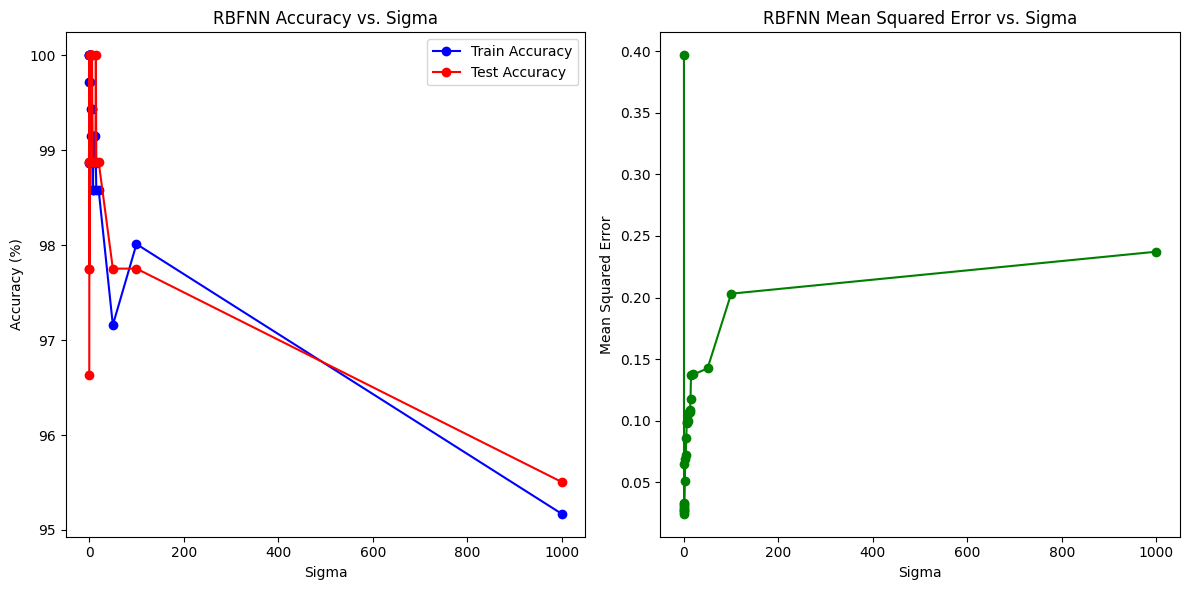

In [12]:
train_accuracy_list_full = []
accuracy_list_full = []
cost_list_full = []

  # using all training datapoints
for sigma in sigmas:
    rbf_full = RBFNN(k=150, sigma=sigma)

    cost = rbf_full.fit_full(train_x, train_y)
    train_full = rbf_full.predict(train_x, train_y)
    acc_full = rbf_full.predict(test_x, test_y)

    train_accuracy_list_full.append(train_full) 
    accuracy_list_full.append(acc_full) 
    cost_list_full.append(cost)
    del rbf_full
    
# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sigmas, train_accuracy_list_full, 'bo-', label='Train Accuracy')
plt.plot(sigmas, accuracy_list_full, 'ro-', label='Test Accuracy')
plt.xlabel('Sigma')
plt.ylabel('Accuracy (%)')
plt.title('RBFNN Accuracy vs. Sigma')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sigmas, cost_list_full, 'go-')
plt.xlabel('Sigma')
plt.ylabel('Mean Squared Error')
plt.title('RBFNN Mean Squared Error vs. Sigma')

plt.tight_layout()
plt.show()


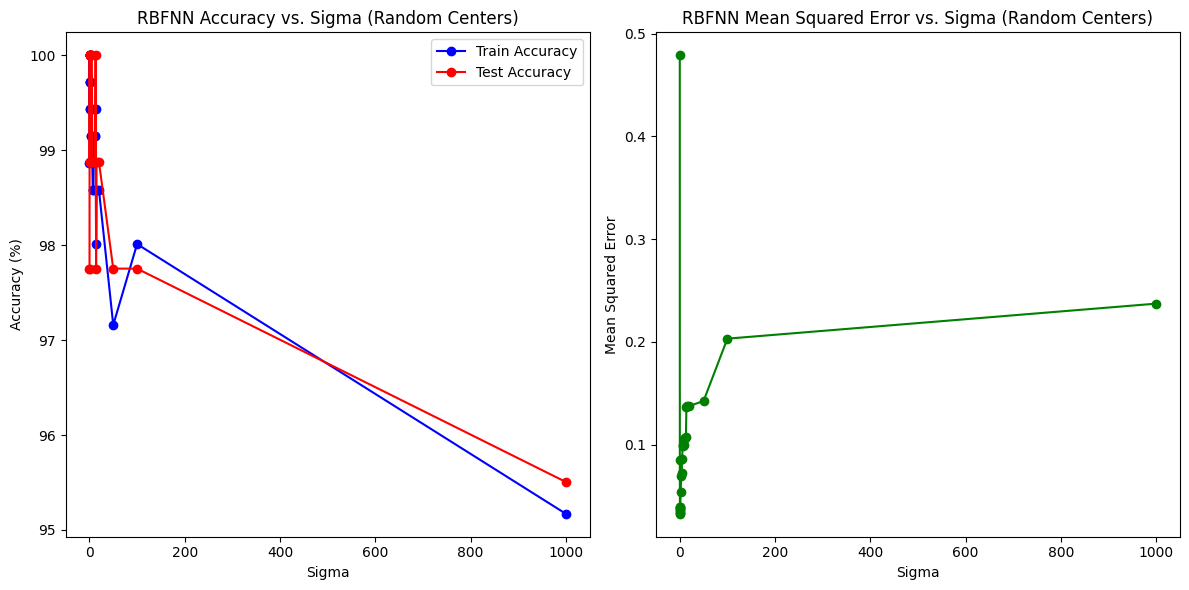

In [13]:
train_accuracy_list_random = []
accuracy_list_random = []
cost_list_random = []
cost_rand = []
# using only 150 centers for random selected
for sigma in sigmas:
    rbf_random = RBFNN(k=150, sigma=sigma)

    cost_rand = rbf_random.fit_randomly(train_x, train_y)
    train_rand = rbf_random.predict(train_x, train_y)
    acc_rand = rbf_random.predict(test_x, test_y)

    train_accuracy_list_random.append(train_rand) 
    accuracy_list_random.append(acc_rand) 
    cost_list_random.append(cost_rand)
    del rbf_random
    
# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sigmas, train_accuracy_list_random, 'bo-', label='Train Accuracy')
plt.plot(sigmas, accuracy_list_random, 'ro-', label='Test Accuracy')
plt.xlabel('Sigma')
plt.ylabel('Accuracy (%)')
plt.title('RBFNN Accuracy vs. Sigma (Random Centers)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sigmas, cost_list_random, 'go-')
plt.xlabel('Sigma')
plt.ylabel('Mean Squared Error')
plt.title('RBFNN Mean Squared Error vs. Sigma (Random Centers)')

plt.tight_layout()
plt.show()

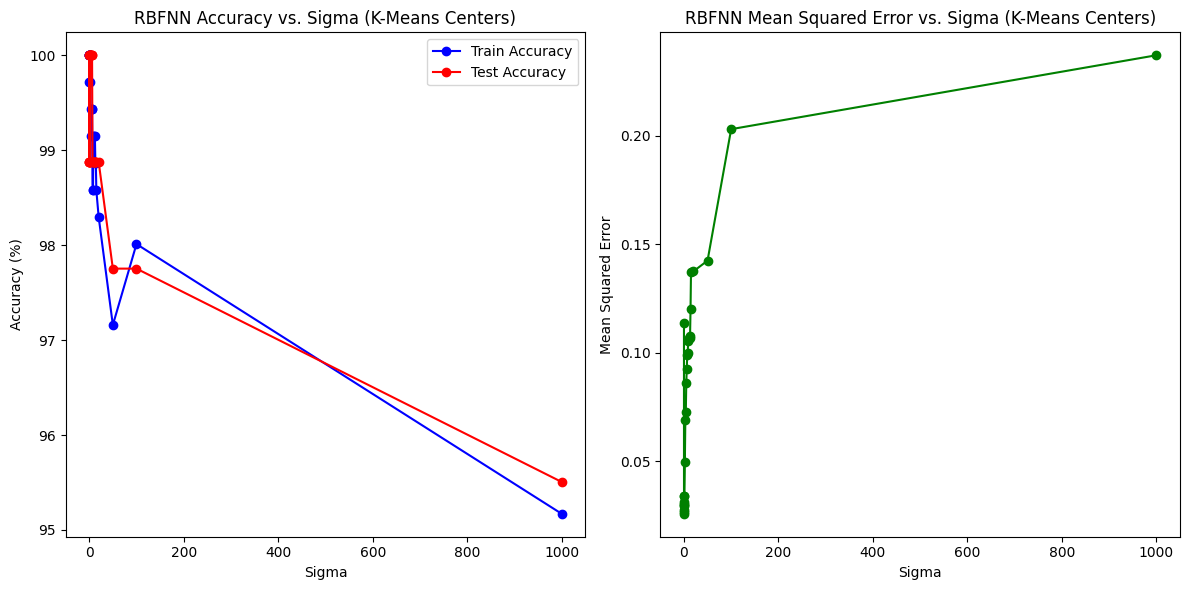

In [14]:
train_accuracy_list_kmeans = []
accuracy_list_kmeans = []
cost_list_kmeans = []

# using only 150 centers for random selected
for sigma in sigmas:
    rbf_kmeans = RBFNN(k=150, sigma=sigma)

    cost = rbf_kmeans.fit_kmeans(train_x, train_y)
    train_kmeans = rbf_kmeans.predict(train_x, train_y)
    acc_kmeans = rbf_kmeans.predict(test_x, test_y)

    train_accuracy_list_kmeans.append(train_kmeans) 
    accuracy_list_kmeans.append(acc_kmeans) 
    cost_list_kmeans.append(cost)
    del rbf_kmeans
    
# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sigmas, train_accuracy_list_kmeans, 'bo-', label='Train Accuracy')
plt.plot(sigmas, accuracy_list_kmeans, 'ro-', label='Test Accuracy')
plt.xlabel('Sigma')
plt.ylabel('Accuracy (%)')
plt.title('RBFNN Accuracy vs. Sigma (K-Means Centers)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sigmas, cost_list_kmeans, 'go-')
plt.xlabel('Sigma')
plt.ylabel('Mean Squared Error')
plt.title('RBFNN Mean Squared Error vs. Sigma (K-Means Centers)')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

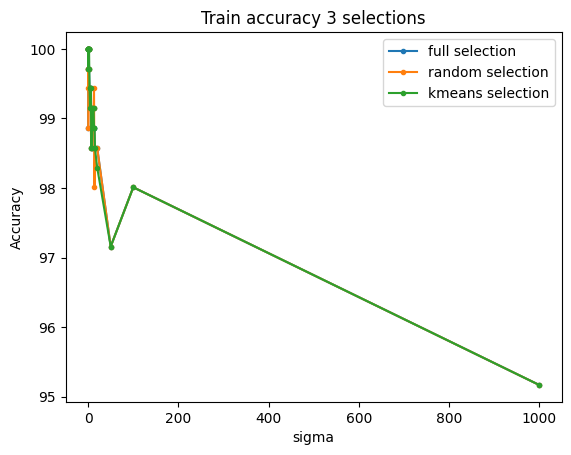

In [15]:
#plot
plt.plot(sigmas,train_accuracy_list_full,marker='.',label="full selection")
plt.plot(sigmas,train_accuracy_list_random,marker='.',label="random selection")
plt.plot(sigmas,train_accuracy_list_kmeans,marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy 3 selections')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

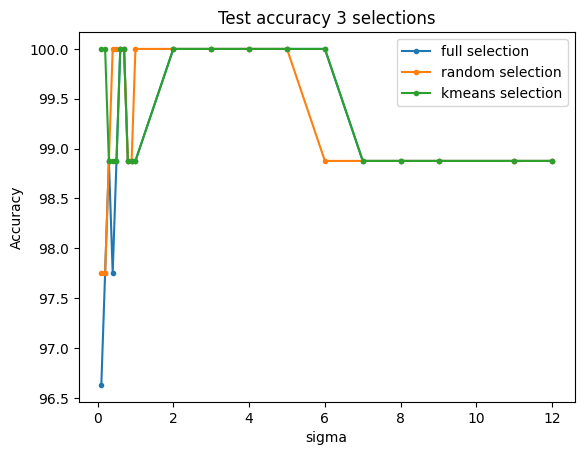

In [16]:
#plot
plt.plot(sigmas[:20],accuracy_list_full[:20],marker='.',label="full selection")
plt.plot(sigmas[:20],accuracy_list_random[:20],marker='.',label="random selection")
plt.plot(sigmas[:20],accuracy_list_kmeans[:20],marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy 3 selections')
plt.legend()
plt.show

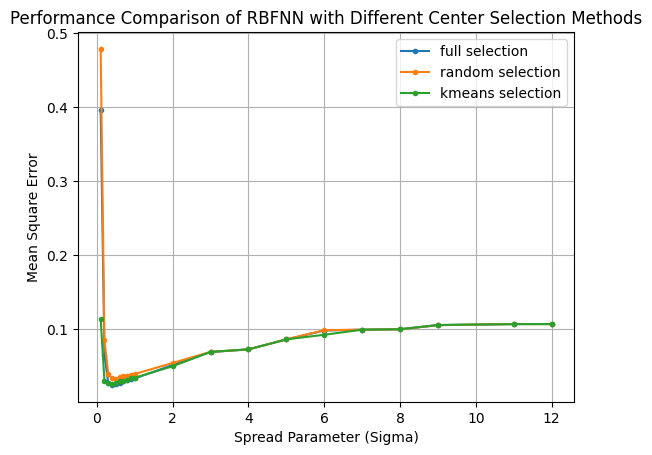

In [17]:
# Plotting
plt.plot(sigmas[:20],cost_list_full[:20],marker='.',label="full selection")
plt.plot(sigmas[:20],cost_list_random[:20],marker='.',label="random selection")
plt.plot(sigmas[:20],cost_list_kmeans[:20],marker='.',label="kmeans selection")

plt.xlabel('Spread Parameter (Sigma)')
plt.ylabel('Mean Square Error')
plt.title('Performance Comparison of RBFNN with Different Center Selection Methods')
plt.legend()
plt.grid(True)
plt.show()
